# Regresión penalizada con Ridge

Dataset: California housing

Target: Mediana de los valores de las casas 

Predictoras: variables numéricas y categóricas

Ridge1 con el hiperparámetro de encogimiento $\alpha = 0.01$

Ridge2 con el hiperparámetro de encogimiento $\alpha = 1$

Ridge3 con el hiperparámetro de encogimiento $\alpha = 100$

Ridge4 con el hiperparámetro de encogimiento $\alpha = 10000$

# Librerias

In [1]:
import pandas as pd
import os
import tarfile
import urllib.request
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Los datos

Carga de datos

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/housing.csv'
housing = pd.read_csv(path)

Variable respuesta y descriptoras

In [3]:
y = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

Variables numéricas

In [4]:
housing_num = housing.drop("ocean_proximity", axis=1)

El imputador

In [5]:
from sklearn.impute import SimpleImputer

El estandarizador

In [6]:
from sklearn.preprocessing import StandardScaler

La clase pipeline para variables numéricas

In [7]:
from sklearn.pipeline import Pipeline

Definición del pipeline que trabaja variables numéricas

In [8]:
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

Clases para procesar a las variables categóricas

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Variables numéricas y categóricas

In [10]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

Definición del pipeline que trabaja variables numéricas y categóricas

In [11]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop = "first"), cat_attribs),
    ])

Aplicación del fullpipeline

In [12]:
X = full_pipeline.fit_transform(housing)

# Regresión Ridge

In [13]:
from sklearn.linear_model import Ridge

## Primer modelo

In [14]:
ridge_reg1 = Ridge(alpha = 0.01, solver = "auto")
ridge_reg1.fit(X, y)

Ridge(alpha=0.01)

Coeficientes del modelo

In [15]:
print('Intercepto (Rigde 1):', ridge_reg1.intercept_)

Intercepto (Rigde 1): 219237.1656087815


In [16]:
print('Coeficientes de regresión (Rigde 1):', ridge_reg1.coef_)

Coeficientes de regresión (Rigde 1): [-52952.76566566 -53767.49316377  13312.96401895 -10319.77420238
  29921.01222746 -44490.38140509  29745.59366794  73636.02928603
 -39766.61371366 155753.81717211  -3697.44168381   4758.62364295]


## Segundo modelo

In [17]:
ridge_reg2 = Ridge(alpha = 1, solver = "auto")
ridge_reg2.fit(X, y)

Ridge(alpha=1)

Coeficientes del modelo

In [18]:
print('Intercepto (Rigde 2):', ridge_reg2.intercept_)

Intercepto (Rigde 2): 219251.85470476953


In [19]:
print('Coeficientes de regresión (Rigde 2):', ridge_reg2.coef_)

Coeficientes de regresión (Rigde 2): [-52925.7575442  -53744.69781116  13319.85812079 -10293.66412867
  29937.78985234 -44479.43818497  29692.21439608  73624.96037269
 -39789.8719159  130031.63921427  -3697.62935336   4750.43033774]


## Tercer modelo

In [20]:
ridge_reg3 = Ridge(alpha = 100, solver = "auto")
ridge_reg3.fit(X, y)

Ridge(alpha=100)

Coeficientes del modelo

In [21]:
print('Intercepto (Rigde 3):', ridge_reg3.intercept_)

Intercepto (Rigde 3): 219767.83669795725


In [22]:
print('Coeficientes de regresión (Rigde 3):', ridge_reg3.coef_)

Coeficientes de regresión (Rigde 3): [-47265.56583418 -48010.44669791  13471.76738911  -8847.6190071
  28240.78187057 -42785.93768798  28430.80133813  73206.45046469
 -42341.4724842    7543.20361536  -2130.87028128   5913.0454192 ]


## Cuarto modelo

In [23]:
ridge_reg4 = Ridge(alpha = 10000, solver = "auto")
ridge_reg4.fit(X, y)

Ridge(alpha=10000)

Coeficientes del modelo

In [24]:
print('Intercepto (Rigde 4):', ridge_reg4.intercept_)

Intercepto (Rigde 4): 213248.32449961078


In [25]:
print('Coeficientes de regresión (Rigde 4):', ridge_reg4.coef_)

Coeficientes de regresión (Rigde 4): [ -9760.89761151 -12228.34267466  11199.36514172   5640.33695302
   4851.91951441  -9762.34854409   5734.63871066  50971.33381983
 -24316.41748776     89.44198348   5253.33235919   5765.58163202]


# Comparación Gráfica

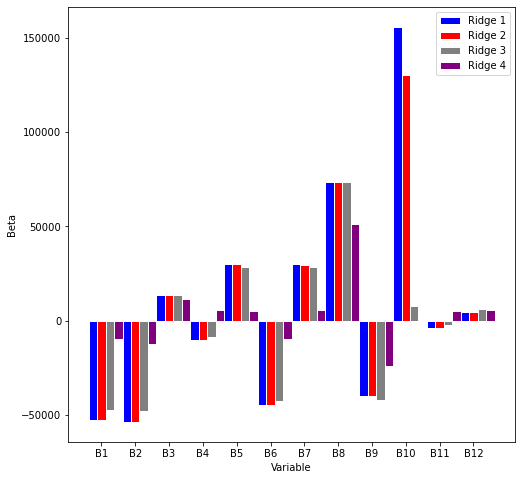

In [26]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(ridge_reg1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# pintar las barras----------------------------------------------
plt.bar(r1, ridge_reg1.coef_, color = "blue", 
width = barWidth, edgecolor = "white", label = "Ridge 1");
plt.bar(r2, ridge_reg2.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "Ridge 2");
plt.bar(r3, ridge_reg3.coef_, color = "gray", 
width = barWidth, edgecolor = "white", label = "Ridge 3");
plt.bar(r4, ridge_reg4.coef_, color = "purple", 
width = barWidth, edgecolor = "white", label = "Ridge 4");
plt.xticks([r + barWidth for r in range(len(ridge_reg1.coef_))], 
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show(fig)

# Comparativa de modelos

In [27]:
mod = ['Ridge1','Ridge2','Ridge3','Ridge4']
score = [ridge_reg1.score(X,y),ridge_reg2.score(X,y),ridge_reg3.score(X,y),ridge_reg4.score(X,y)]
df = pd.DataFrame()
df['Modelo'] = mod
df['Score'] = score
df

,Modelo,Score
0,Ridge1,0.645453
1,Ridge2,0.645441
2,Ridge3,0.644815
3,Ridge4,0.537983


Elaborado por Jairo Rojas